### **Project Statement**

‘Marketing mix’ is a popular concept used in implementing marketing strategies. A marketing mix includes multiple areas of focus as part of a comprehensive marketing plan. This all revolves around the four Ps of marketing - product, price, place, and promotion.

![Example Image](https://drive.google.com/uc?id=1muA2eMQhDnXnF0gDxNx5lcFsebPfrZSl)

# Import Libraries

In [354]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import scipy.stats as stats
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import Dataset

In [355]:
marketin_data_df = pd.read_csv('marketing_data.csv')
marketin_data_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [356]:
marketin_data_df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [357]:
marketin_data_df.shape

(2240, 28)

In [358]:
data_describtion = pd.read_excel('1688639964_datadictionaryresponsetomarketingcampaigns.xlsx')
data_describtion

,Variable,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,number of small children in customer's househo...
6,Teenhome,no of teenagers in customer's house
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,number of days since the last purchase
9,MntWines,amount spent on wine in last 2 years


# Data Preprocessing

In [359]:
df = marketin_data_df.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


## Remove Missing Values

In [360]:
#check number of missing values in the Data Frame for each column.
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


In [361]:
# Get the index of rows with missing values
missing_values_rows_indexes = df[df.isnull().any(axis=1)].index
df.loc[missing_values_rows_indexes].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA


### Handling Income's missing values
to remove Income's missing values, several steps will be applied:
1. transform Income from string type to float.
2. performing missing values by assuming that the customers with similar education and marital status make the same yearly income, on average.

In [362]:
# 1. transform Income from string type to float.
df[' Income '] = df[' Income '].apply(
    lambda s: ''.join(c for c in str(s) if c.isdigit()) if pd.notna(s) and any(i.isdigit() for i in s) else np.nan)

df[' Income '] = df[' Income '].astype(float)
df[[' Income ']].head()

,Income
0,8483500.0
1,5709100.0
2,6726700.0
3,3247400.0
4,2147400.0


In [363]:
#2. performing missing values by assuming that the customers with similar
#   education and marital status make the same yearly income, on average.

#Calculate the average income of each education and maritial status
grouped = df.groupby(['Education', 'Marital_Status'])[' Income '].mean().reset_index()
grouped[' Income '] = grouped[' Income '] / 100.0
grouped

,Education,Marital_Status,Income
0,2n Cycle,Divorced,49395.130435
1,2n Cycle,Married,46201.100000
2,2n Cycle,Single,53673.944444
3,2n Cycle,Together,44736.410714
4,2n Cycle,Widow,51392.200000
5,Basic,Divorced,9548.000000
6,Basic,Married,21960.500000
7,Basic,Single,18238.666667
8,Basic,Together,21240.071429
9,Basic,Widow,22123.000000


In [364]:
# Fill the missing values 
for index, row in df.iterrows():
    if pd.isnull(row[' Income ']):
        education = row['Education']
        marital_status = row['Marital_Status']
        avg_income = grouped[(grouped['Education'] == education) & (grouped['Marital_Status'] == marital_status)][' Income '].values
        if avg_income:
            df.at[index, ' Income '] = avg_income[0]

In [365]:
# check the process performed
df.loc[missing_values_rows_indexes].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,58138.031579,2,1,11/19/12,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,50800.258741,1,0,11/15/13,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,56041.422414,1,0,3/2/14,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,51322.182927,1,0,2/20/13,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,58138.031579,0,1,7/11/13,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA


In [366]:
df[' Income '].isnull().sum()

0

# Create Variables

• Create variables to populate the total number of children, age, and total spending. 

### Calculate total number of children

In [367]:
# calculate total children 
total_children=df['Kidhome']+df['Teenhome']

# insert total children as new column
df.insert(loc=df.columns.get_loc('Teenhome')+1, column='total_children', value=total_children)

### Calculate age

In [368]:
# create function to calculate the age from birth year
def calculate_age(birth_year):
    current_year = datetime.datetime.now().year
    age = current_year - birth_year
    return age

#calculate age
age = df['Year_Birth'].apply(lambda x: calculate_age(x))

# insert age as new column
df.insert(loc=df.columns.get_loc('Year_Birth')+1, column='age', value=age)

### Calculate total number of purchases

In [369]:
# calculate total purchases
total_purchases=df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

# insert total purchases as new column
df.insert(loc=df.columns.get_loc('NumStorePurchases')+1, column='total_purchases', value=total_purchases)

In [370]:
df.head()

,ID,Year_Birth,age,Education,Marital_Status,Income,Kidhome,Teenhome,total_children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,total_purchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,53,Graduation,Divorced,8483500.0,0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,15,1,0,0,0,0,0,1,0,SP
1,1,1961,62,Graduation,Single,5709100.0,0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,18,5,0,0,0,0,1,1,0,CA
2,10476,1958,65,Graduation,Married,6726700.0,0,1,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,11,2,0,0,0,0,0,0,0,US
3,1386,1967,56,Graduation,Together,3247400.0,1,1,2,5/11/14,0,10,0,1,0,0,0,1,1,0,2,4,7,0,0,0,0,0,0,0,AUS
4,5371,1989,34,Graduation,Single,2147400.0,1,0,1,4/8/14,0,6,16,24,11,0,34,2,3,1,2,8,7,1,0,0,0,0,1,0,SP


# Visualize Data

## Create Box plots

In [372]:
# Remove uncorleated columns
df2 = df.drop(['ID','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response'],axis=1)

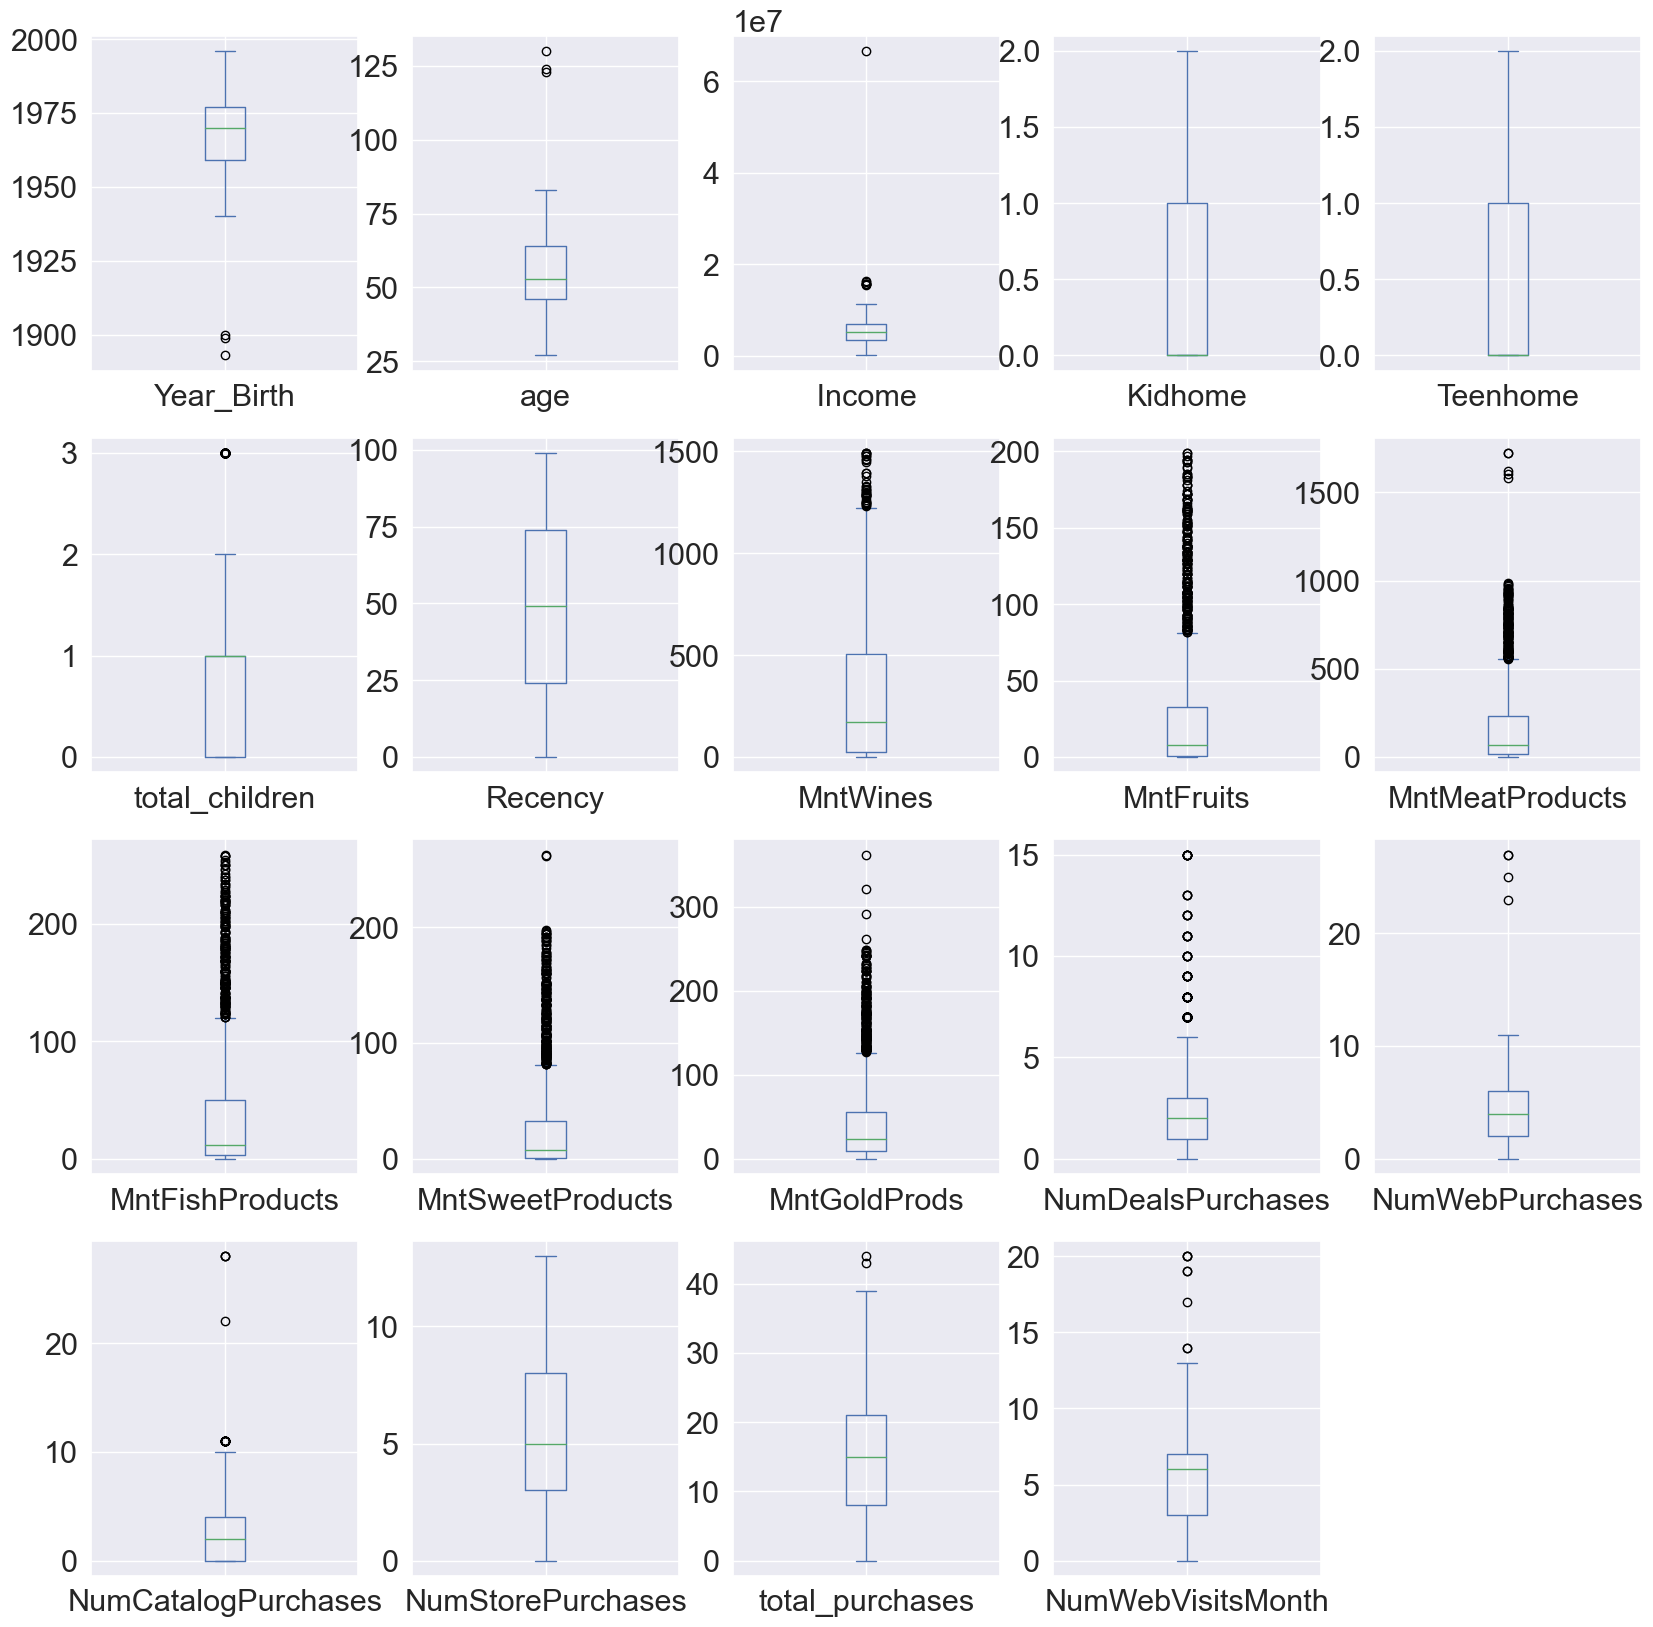

<Figure size 640x480 with 0 Axes>

In [373]:
# plot box plots
numeric_cols = df2.select_dtypes(include=['number']).columns
df2[numeric_cols].plot(subplots=True, layout=(4,5), kind='box', figsize=(20,20))
plt.show()
plt.clf()

In [374]:
# remove entries with age outliers

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define criteria for an outlier
outlier_criteria = (df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))

# Invert the outlier criteria using ~ to filter the DataFrame
df = df[~outlier_criteria]
df.shape

(2237, 31)

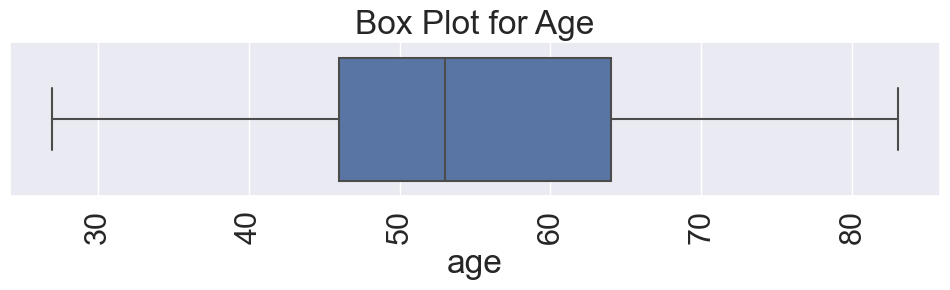

<Figure size 640x480 with 0 Axes>

In [375]:
#re-plot income box plot to check outliers removed
plt.figure(figsize=(12, 2))
sns.boxplot(data=df, x='age')
plt.title('Box Plot for Age')
plt.xticks(rotation=90)
plt.show()
plt.clf()

## Create Histograms

In [376]:
# define a function that plot histogram
def plot_hist(col):
    plt.figure(figsize=(15, 6))
    
    n, bins, patches = plt.hist(df[col],
                                alpha=0.5,
                                label=col,
                                color='pink')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    for i in range(len(n)):
        if n[i] == 0: 
            continue
            
        plt.text(bins[i], n[i], str(int(n[i])))

    plt.legend(loc='upper right')
    plt.show()
    plt.clf()

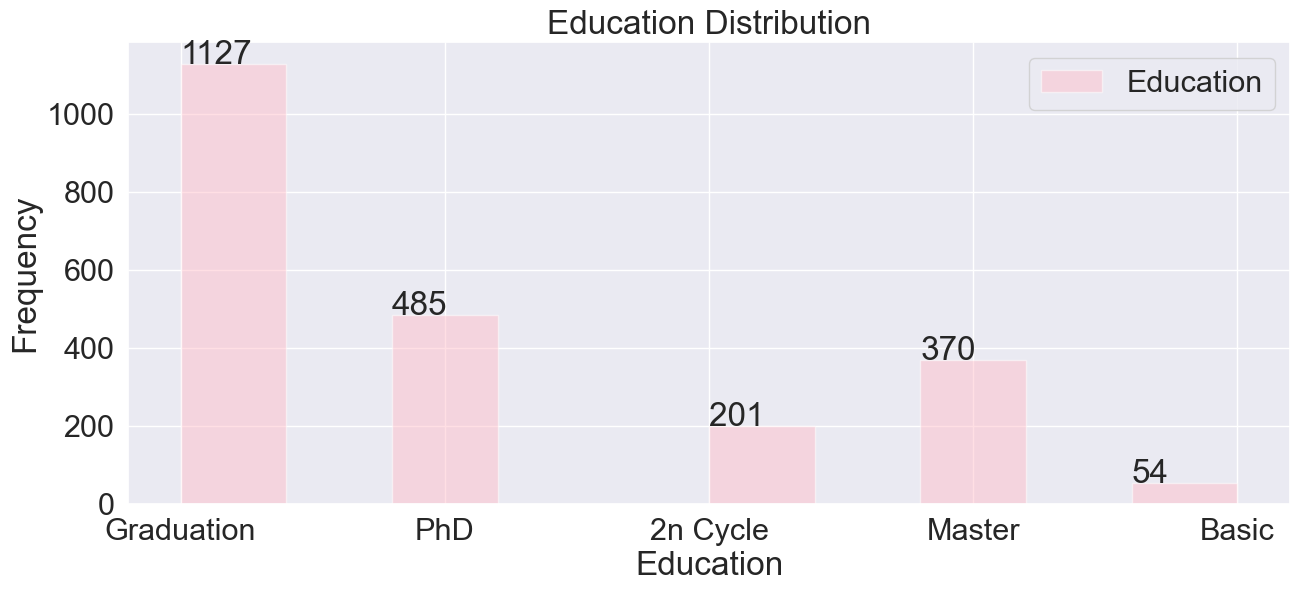

<Figure size 640x480 with 0 Axes>

In [377]:
#plot histograms for customers' education
plot_hist('Education')

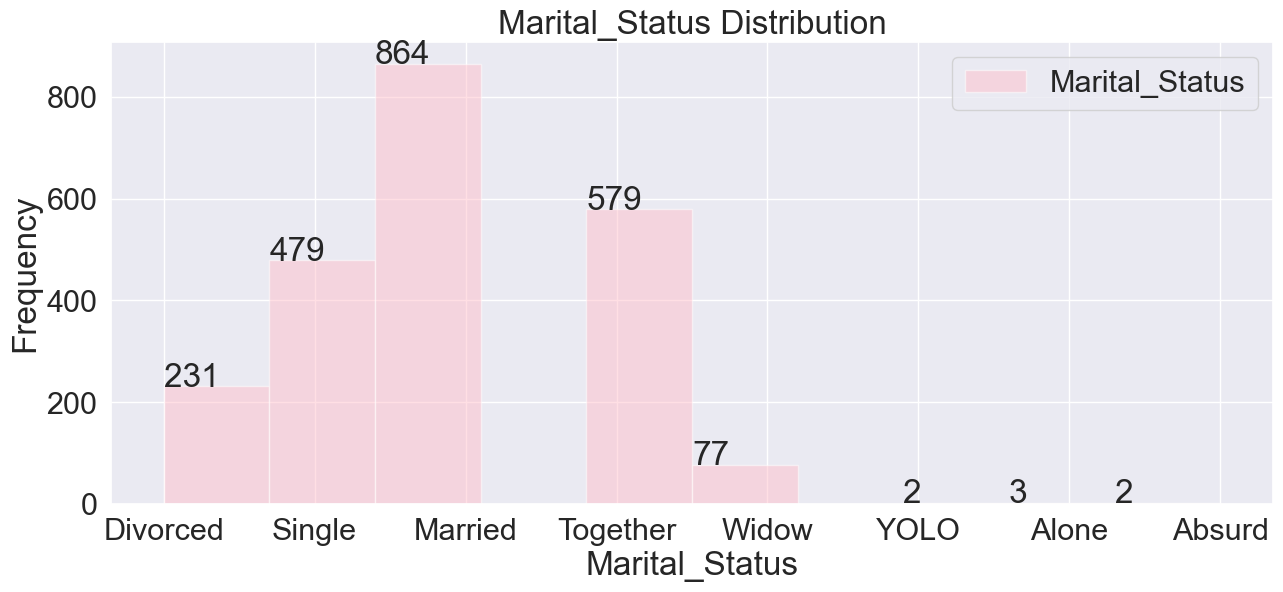

<Figure size 640x480 with 0 Axes>

In [378]:
#plot histograms for customers' marital status
plot_hist('Marital_Status')

# Encode columns

## Apply Ordinal encoding to Education

In [379]:
# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

#replace 2nd Cycle to Master
df['Education'] = df['Education'].str.replace('2n Cycle','Master')
# Fit and transform the column using OrdinalEncoder
Education_rank = encoder.fit_transform(df[['Education']])
df.insert(df.columns.get_loc('Education') + 1, 'Education_rank', Education_rank)
df.head()

,ID,Year_Birth,age,Education,Education_rank,Marital_Status,Income,Kidhome,Teenhome,total_children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,total_purchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,53,Graduation,1.0,Divorced,8483500.0,0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,15,1,0,0,0,0,0,1,0,SP
1,1,1961,62,Graduation,1.0,Single,5709100.0,0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,18,5,0,0,0,0,1,1,0,CA
2,10476,1958,65,Graduation,1.0,Married,6726700.0,0,1,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,11,2,0,0,0,0,0,0,0,US
3,1386,1967,56,Graduation,1.0,Together,3247400.0,1,1,2,5/11/14,0,10,0,1,0,0,0,1,1,0,2,4,7,0,0,0,0,0,0,0,AUS
4,5371,1989,34,Graduation,1.0,Single,2147400.0,1,0,1,4/8/14,0,6,16,24,11,0,34,2,3,1,2,8,7,1,0,0,0,0,1,0,SP


## Apply One-hot encoding to: Country, Marital Status

In [381]:
# Apply one-hot encoding to Country using pandas get_dummies()
encoded_countries = pd.get_dummies(df['Country'], prefix='Country')

# Insert the encoded DataFrame with the original DataFrame
for col_name, col_data in encoded_countries.items():
    df.insert(df.columns.get_loc('Country') + 1, col_name, col_data)
    
df.head()

,ID,Year_Birth,age,Education,Education_rank,Marital_Status,Income,Kidhome,Teenhome,total_children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,total_purchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Country_US,Country_SP,Country_SA,Country_ME,Country_IND,Country_GER,Country_CA,Country_AUS
0,1826,1970,53,Graduation,1.0,Divorced,8483500.0,0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,15,1,0,0,0,0,0,1,0,SP,0,1,0,0,0,0,0,0
1,1,1961,62,Graduation,1.0,Single,5709100.0,0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,18,5,0,0,0,0,1,1,0,CA,0,0,0,0,0,0,1,0
2,10476,1958,65,Graduation,1.0,Married,6726700.0,0,1,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,11,2,0,0,0,0,0,0,0,US,1,0,0,0,0,0,0,0
3,1386,1967,56,Graduation,1.0,Together,3247400.0,1,1,2,5/11/14,0,10,0,1,0,0,0,1,1,0,2,4,7,0,0,0,0,0,0,0,AUS,0,0,0,0,0,0,0,1
4,5371,1989,34,Graduation,1.0,Single,2147400.0,1,0,1,4/8/14,0,6,16,24,11,0,34,2,3,1,2,8,7,1,0,0,0,0,1,0,SP,0,1,0,0,0,0,0,0


In [382]:
# Apply one-hot encoding to Marital Status using pandas get_dummies()
encoded_marital_status = pd.get_dummies(df['Marital_Status'], prefix='Marital_Status')

# Insert the encoded DataFrame with the original DataFrame
for col_name, col_data in encoded_marital_status.items():
    df.insert(df.columns.get_loc('Marital_Status') + 1, col_name, col_data)
    
df.head()

,ID,Year_Birth,age,Education,Education_rank,Marital_Status,Marital_Status_YOLO,Marital_Status_Widow,Marital_Status_Together,Marital_Status_Single,Marital_Status_Married,Marital_Status_Divorced,Marital_Status_Alone,Marital_Status_Absurd,Income,Kidhome,Teenhome,total_children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,total_purchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Country_US,Country_SP,Country_SA,Country_ME,Country_IND,Country_GER,Country_CA,Country_AUS
0,1826,1970,53,Graduation,1.0,Divorced,0,0,0,0,0,1,0,0,8483500.0,0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,15,1,0,0,0,0,0,1,0,SP,0,1,0,0,0,0,0,0
1,1,1961,62,Graduation,1.0,Single,0,0,0,1,0,0,0,0,5709100.0,0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,18,5,0,0,0,0,1,1,0,CA,0,0,0,0,0,0,1,0
2,10476,1958,65,Graduation,1.0,Married,0,0,0,0,1,0,0,0,6726700.0,0,1,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,11,2,0,0,0,0,0,0,0,US,1,0,0,0,0,0,0,0
3,1386,1967,56,Graduation,1.0,Together,0,0,1,0,0,0,0,0,3247400.0,1,1,2,5/11/14,0,10,0,1,0,0,0,1,1,0,2,4,7,0,0,0,0,0,0,0,AUS,0,0,0,0,0,0,0,1
4,5371,1989,34,Graduation,1.0,Single,0,0,0,1,0,0,0,0,2147400.0,1,0,1,4/8/14,0,6,16,24,11,0,34,2,3,1,2,8,7,1,0,0,0,0,1,0,SP,0,1,0,0,0,0,0,0


### Remove original columns

In [383]:
df = df.drop(['Year_Birth', 'Education', 'Marital_Status', 'Country'], axis=1)

## Create Heatmap for correlation

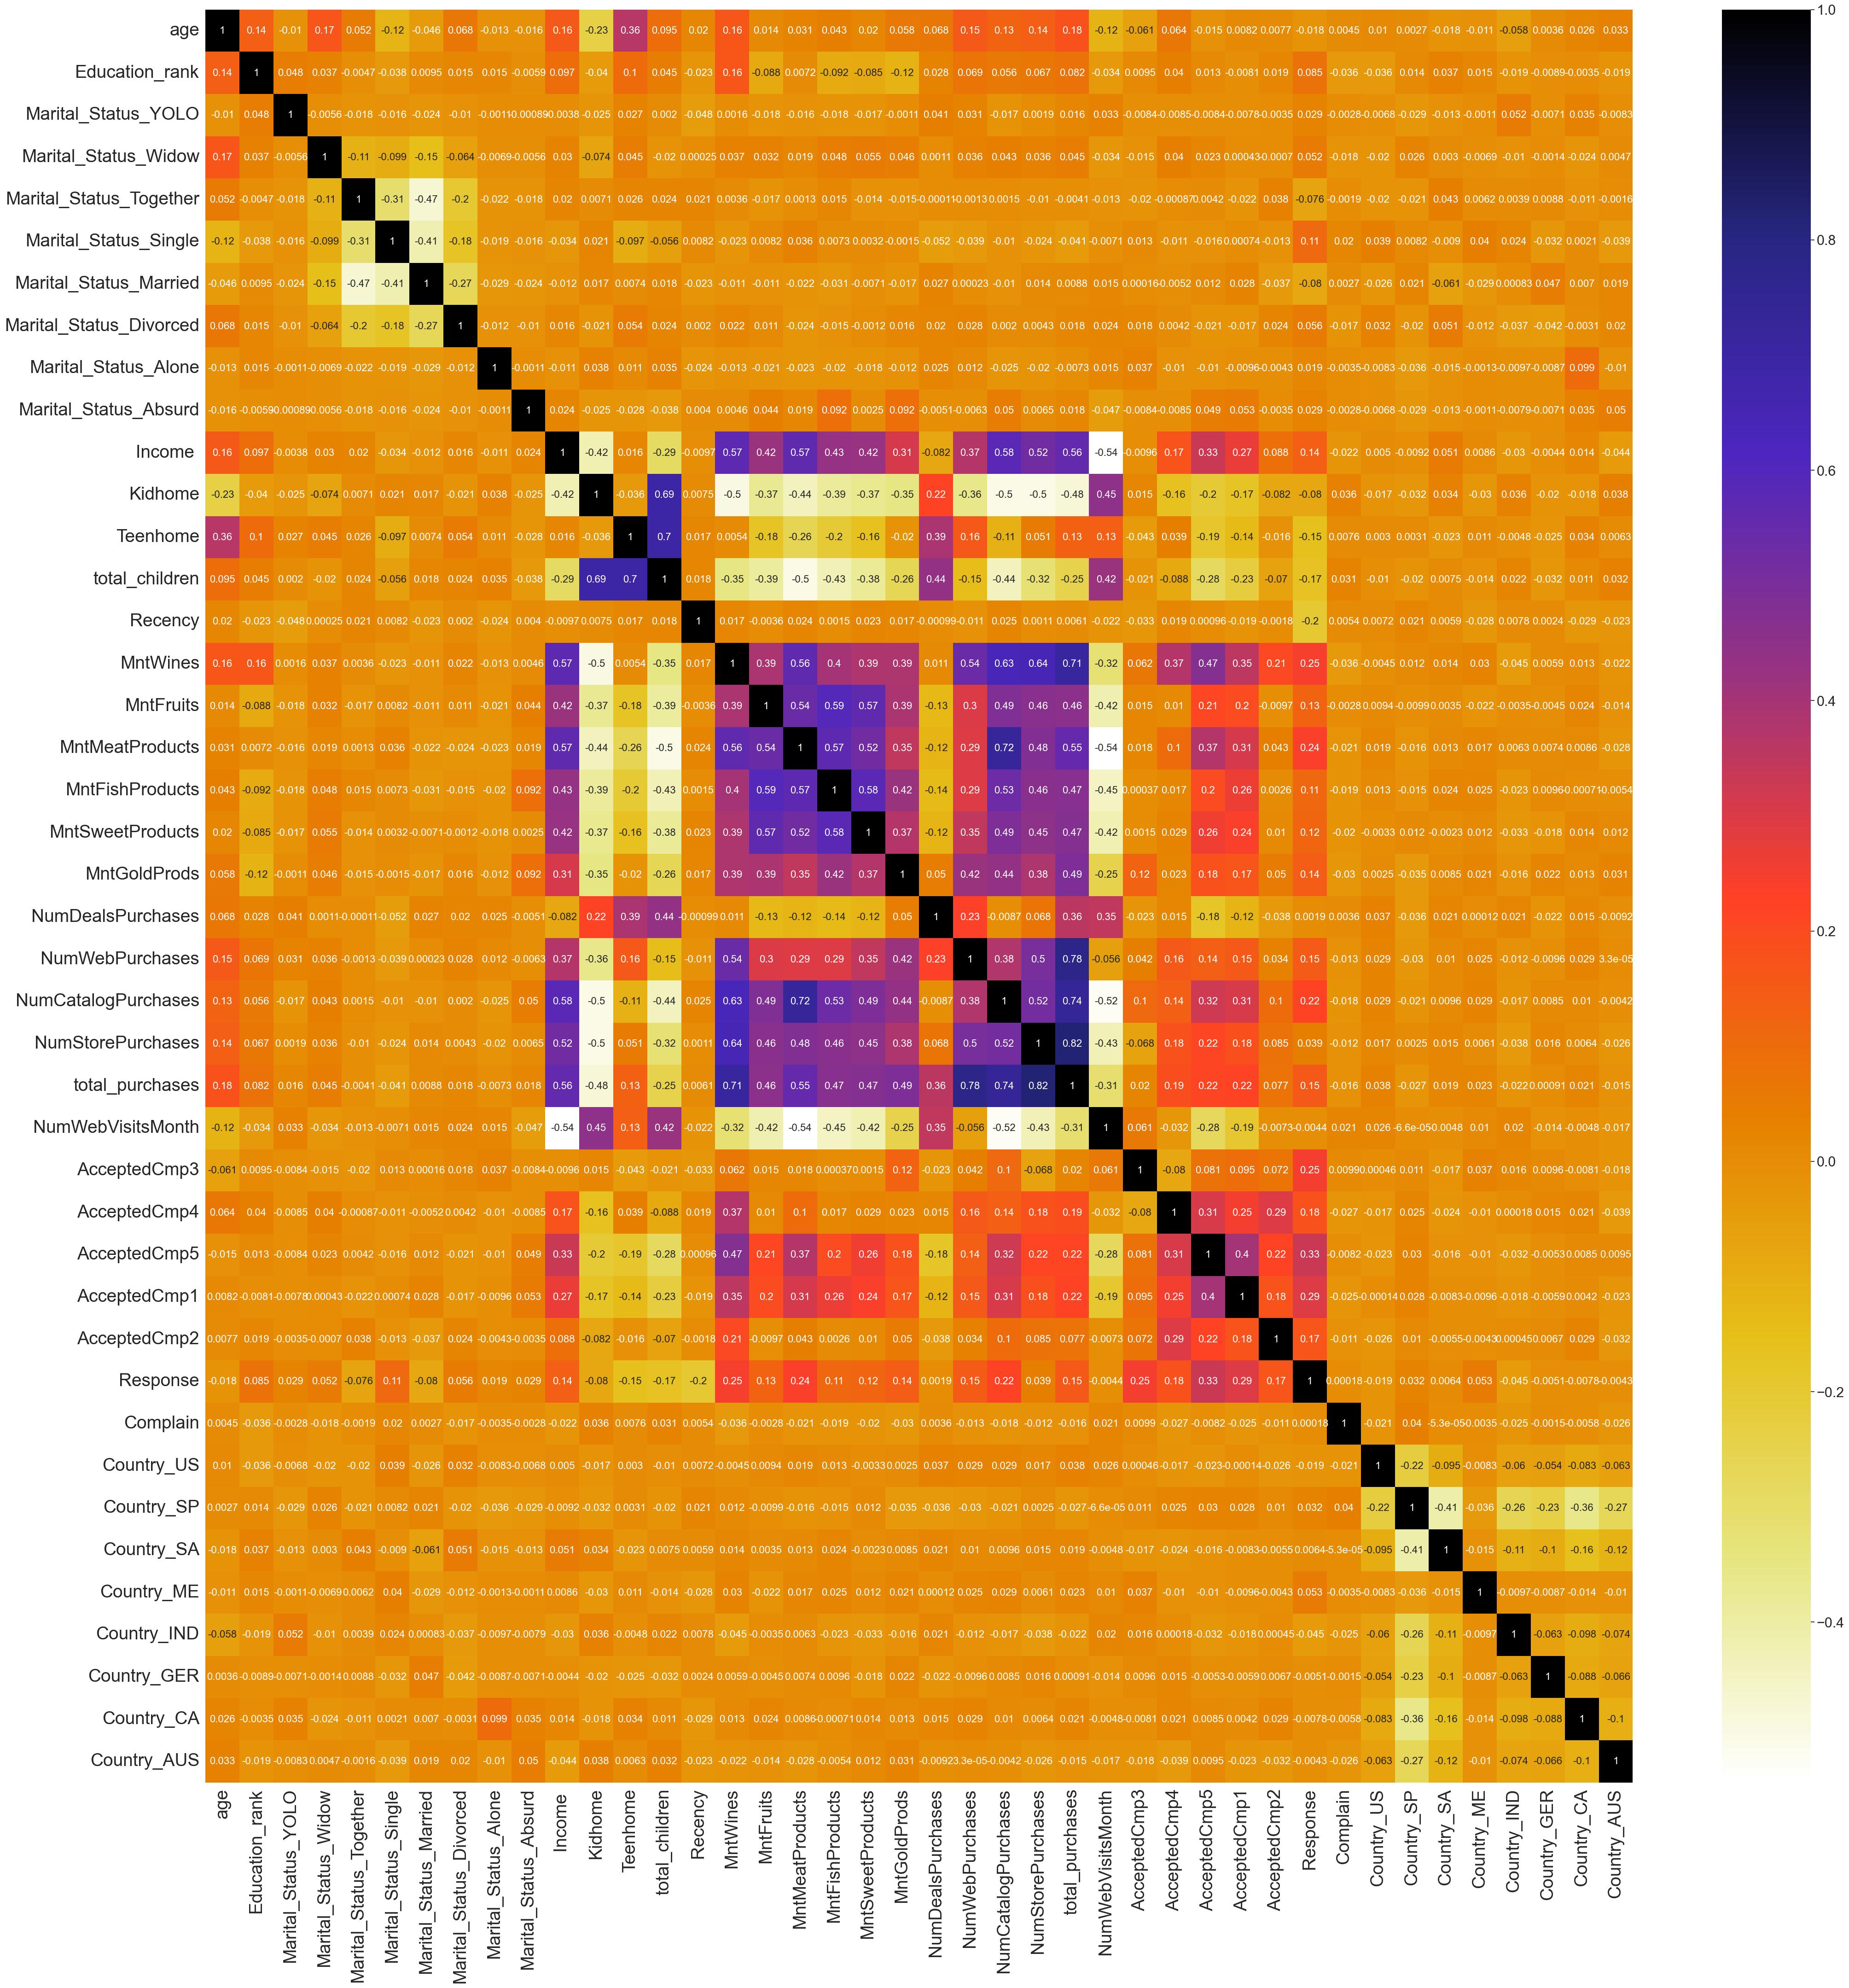

In [385]:
cor = df.loc[:, df.columns != 'ID'].corr()

plt.figure(figsize=(50,50))
ax = sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True, annot_kws={"size": 16})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 28)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 28)
plt.show()

# Test Hypotheses

#### Null-hypothesis: Older people are tech-savvy and would not probably prefer shopping in-store.
#### Alternative-hypothesis: Older people are not as tech-savvy and probably prefer shopping in-store.

In [386]:
df1 = df[df["age"] >= 60]

In [387]:
t, p = stats.ttest_ind(df1["NumStorePurchases"], df1["NumWebPurchases"] ,alternative='greater')
print('P-Value for ttest is: ', p)

if p < 0.05:
    print("There is evidence to reject the null hypothesis.")
else:
    print("There is not enough evidence to reject the null hypothesis.")

P-Value for ttest is:  6.746792091579267e-33
There is evidence to reject the null hypothesis.


#### Null-hypothesis: Customers with kids probably have moree time to visit a store and would not prefer to shop online.
#### Alternative-hypothesis: Customers with kids probably have less time to visit a store and would prefer to shop online.

In [388]:
df2 = df[['total_children', 'NumWebPurchases', 'NumStorePurchases']]
with_kids = df2[df2["total_children"] > 0]

In [389]:
t, p = stats.ttest_ind(with_kids['NumWebPurchases'], with_kids['NumStorePurchases'] ,alternative='greater')
print('P-Value for ttest is: ', p)

if p < 0.05:
    print("There is evidence to reject the null hypothesis.")
else:
    print("There is not enough evidence to reject the null hypothesis.")

P-Value for ttest is:  1.0
There is not enough evidence to reject the null hypothesis.


#### Null-hypothesis: Other distribution channels may not cannibalize sales at the store.
#### Alternative-hypothesis: Other distribution channels may cannibalize sales at the store.

In [390]:
store_channel = df['NumStorePurchases']
rest_channels = pd.Series(df['total_purchases']-df['NumStorePurchases'])

In [391]:
t_stat, p_val = stats.ttest_ind(store_channel, rest_channels, alternative = 'less')
print('P-Value for ttest is: ', p_val)

if p_val < 0.05:
    print("There is evidence to reject the null hypothesis.")
else:
    print("There is not enough evidence to reject the null hypothesis.")

P-Value for ttest is:  9.227636616183726e-128
There is evidence to reject the null hypothesis.


#### Null-hypothesis: the US fare is worse than the rest of the world in terms of total purchases.
#### Alternative-hypothesis: the US fare significantly better than the rest of the world in terms of total purchases.

In [392]:
us_purchases = df[df['Country_US']==1]['total_purchases']
non_us_purchases = df[df['Country_US']==0]['total_purchases']

In [393]:
t_stat, p_val = stats.ttest_ind(us_purchases, non_us_purchases, alternative='greater')
print('P-Value for ttest is: ', p_val)

if p_val < 0.05:
    print("There is evidence to reject the null hypothesis.")
else:
    print("There is not enough evidence to reject the null hypothesis.")

P-Value for ttest is:  0.03656005370147413
There is evidence to reject the null hypothesis.


# Visualization

### Which products are performing the best, and which are performing the least in terms of revenue?

In [394]:
products = ('Wine', 'Fruit', 'Meat', 'Fish', 'Sweet','Gold')
y_axis = ['Wine', 'Fruit', 'Meat', 'Fish', 'Sweet','Gold']
x_axis = [df['MntWines'].sum(),
          df['MntFruits'].sum(),
          df['MntMeatProducts'].sum(),
          df['MntFishProducts'].sum(),
          df['MntSweetProducts'].sum(),
          df['MntGoldProds'].sum()]
fig = px.bar(x=x_axis,
             y=y_axis,
             category_orders={'Products':products},
             title='Products Revenue',
             labels=dict(x="Revenue", y="Products"))
fig.update_yaxes(categoryorder='total ascending')
fig.show()

**In conclusion, wine products achieved the highest revenue. While, Fruit products achieved the lowest in terms of revenue!**

### Is there any pattern between the age of customers and the last campaign acceptance rate?

In [395]:
df_campaign = df[df["Response"] == 1]
age_groups = ['20-29', '30-39', '40-49', '50-59','60+']
population = [
              df_campaign[(df_campaign.age > 20 ) & (df_campaign.age <=29)].shape[0],
              df_campaign[(df_campaign.age > 30 ) & (df_campaign.age <=39)].shape[0],
              df_campaign[(df_campaign.age > 40 ) & (df_campaign.age <=49)].shape[0],
              df_campaign[(df_campaign.age > 50 ) & (df_campaign.age <=59)].shape[0],
              df_campaign[(df_campaign.age > 60 )].shape[0]
              ]
fig = px.pie(values=population,
             names=age_groups,
             title='Acceptance Campaign Age Groups',
)
fig.show()

**In conclusion, older people seem to accept the last campaign in contrast to the younger people!**

### Which Country has the greatest number of customers who accepted the last campaign?

In [396]:
df.columns

Index(['ID', 'age', 'Education_rank', 'Marital_Status_YOLO',
       'Marital_Status_Widow', 'Marital_Status_Together',
       'Marital_Status_Single', 'Marital_Status_Married',
       'Marital_Status_Divorced', 'Marital_Status_Alone',
       'Marital_Status_Absurd', ' Income ', 'Kidhome', 'Teenhome',
       'total_children', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'total_purchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country_US',
       'Country_SP', 'Country_SA', 'Country_ME', 'Country_IND', 'Country_GER',
       'Country_CA', 'Country_AUS'],
      dtype='object')

In [397]:
SP=df_campaign[df_campaign['Country_SP']==1].value_counts()
SA=df_campaign[df_campaign['Country_SA']==1].value_counts()
CA=df_campaign[df_campaign['Country_CA']==1].value_counts()
AUS=df_campaign[df_campaign['Country_AUS']==1].value_counts()
GER=df_campaign[df_campaign['Country_GER']==1].value_counts()
US=df_campaign[df_campaign['Country_US']==1].value_counts()
IND=df_campaign[df_campaign['Country_IND']==1].value_counts()
ME=df_campaign[df_campaign['Country_ME']==1].value_counts()



countries=('SP','SA','CA','AUS','GER','US','IND','ME')
x_axis=['Spain','Saudi Arabia','Canada','Australia','Germany','USA','India','Montenegro']
y_axis = [df_campaign[df_campaign['Country_SP']==1].shape[0],
          df_campaign[df_campaign['Country_SA']==1].shape[0],
          df_campaign[df_campaign['Country_CA']==1].shape[0],
          df_campaign[df_campaign['Country_AUS']==1].shape[0],
          df_campaign[df_campaign['Country_GER']==1].shape[0],
          df_campaign[df_campaign['Country_US']==1].shape[0],
          df_campaign[df_campaign['Country_IND']==1].shape[0],
          df_campaign[df_campaign['Country_ME']==1].shape[0]]
fig = px.bar(x=x_axis,
             y=y_axis,
             category_orders={'Countries':countries},
             title='Countries Revenue',
             labels=dict(x="Revenue", y="Products"))
fig.update_yaxes(categoryorder='total ascending')
fig.show()

**In conclusion, people from Spain 🇪🇸 seems to have accepted the last campaign the highest!**

### Do you see any pattern in the no. of children at home and total spend?

In [398]:
fig = px.box(df, x="total_children",y='total_purchases')
fig.show()

**In conclusion, most families spend around 5-15 K on their children. While, people with no children spend less!**

### Education background of the customers who complained in the last 2 years.

In [401]:
Education=('Graduation', 'Master', 'PhD','Basic')
x_axis=['Graduation', 'Master', 'PhD','Basic']
y_axis = [df_complains[df_complains['Education_rank']==1.0].shape[0],
          df_complains[df_complains['Education_rank']==2.0].shape[0],
          df_complains[df_complains['Education_rank']==3.0].shape[0],
          df_complains[df_complains['Education_rank']==0.0].shape[0]]

fig = px.bar(x=x_axis,
             y=y_axis,
             category_orders={'Education':countries},
             title='Education Count for Customer who Complained in the Last 2 years',
             labels=dict(x="Education", y="Count"))
fig.update_yaxes(categoryorder='total ascending')

fig.show()

**In conclusion, most people who complained in the last 2 years has a Bachelor degree!**